# <font color='blue'> Table Of Contents </font>

## <font color='blue'> Key Generation in Wallets </font>

* Introduction
* Deterministic Wallets
* Non-Deterministic Wallets
* References

# <font color='blue'> Key Generation in Wallets </font>

## <font color='blue'> Introduction </font>

This week's notebook will be lighter. It's highly recommended to follow the practical videos, create accounts via Metamask and MyEtherWallet, learn how to get Ether from a test faucet like Rinkeby and do some transactions among your test accounts. It's important to get comfortable as blockchain users before we look at developer tools like geth and remix in the upcoming sessions.

In this notebook, we'll try to understand how Metamask (and others) use a seed phrase and deterministically creating multiple private/public key pairs for various blockchain accounts. We'll also understand the difference between deterministic and non-deterministic wallet flows.



## <font color='blue'> Deterministic Wallets </font>

Similar to ERCs (like ERC-20) in Ethereum, Bitcoin has BIPs for improvements in Bitcoin. One such document is BIP-39 which forms the basis of most modern wallets' mnemonic word based wallet seed creations. This process is not specific to Bitcoin and is used to create keys/accounts in most blockchains, as asymmetric private/public key generation forms the basis for all. 

As you must have seen while creating an account on Metamask, that it'll generate 12 random words in a specific order for you to store and it forms the seed for your wallet. The following example is a simplified version of what happens to enhance the core understanding. The actual protocols used are a bit more involved to be cryptographically secure. 

For example, suppose that the wallet org has created a list of 2048 distinct words. The words are chosen such that even the first four-letter prefixes are different for each word and then they are stored in a sorted order so that each word has a specific index. Now every time that you create a new wallet, it'll randomly generate 12 words out of that list, in a particular order, as your seed. Let's say, it picks the following 12 words:

```leader exit rack diary soup wash dilemma differ food term owner project```

Now, the wallet will create numbers out of these words by just using the index of the wordlist:

```0953 0401 1421 0320 1502 1823 0333 0321 0513 1602 1251 1322```

The seed, as an example, can just be a simple concatenation of these numbers together, or based on them in some deterministic ordered way:

```095304011421032015021823033303210513160212511322```

This random generation happens in your Metamask extension in your browser using your browser's random data generation methods (Crypto.getRandomValues). These ultimately get their entropy from your system's atmospheric noise like CPU heat changes, mouse movements, etc.

This seed is then used to deterministically create a master key, which then leads to generating as many keys/accounts as you want, in order. An example of such a flow comes from BIP-32:

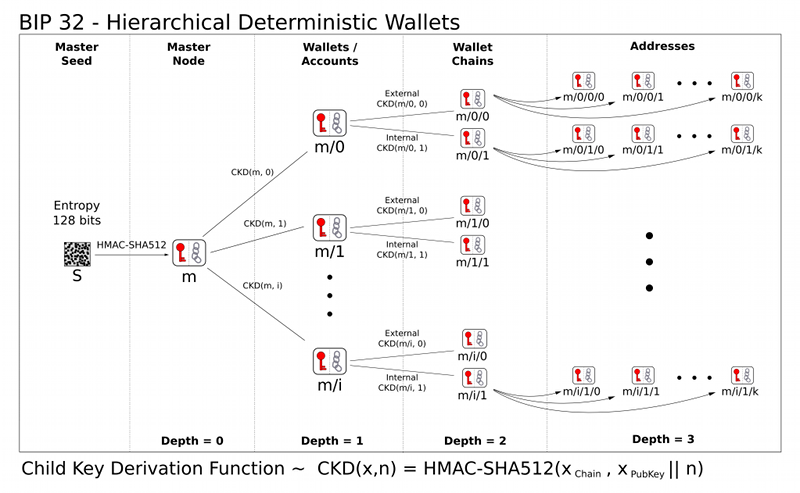

Although modern practices might not exactly follow the structure shown in the image above, the key point here is that the whole flow will generate exactly the same data given the same initial seed. This means that if you just have your seed phrase, you can lose all your accounts and their keys, and can still recover them by using the same seed again!

You might have seen Metamask ask you to create a password as well. This password is just used to encrypt the seed and the generated keystore on your machine to prevent unauthorized access locally, but is not part of the whole flow otherwise.



## <font color='blue'> Non-Deterministic Wallets </font>
    
A non-deterministic wallet will use randomness to create a new key pair directly, like we saw in an earlier notebook using python's cryptography library. It'll do this for every key pair generation request. These keys will not be connected to each other in any way. This means that you need to backup all of them effectively.


Metamask (and others) has a hybrid approach where it'll create keys/accounts deterministically from the seed for accounts created via Metamask itself. But it'll allow you to import pre-generated account information as well. Of course, all the imported accounts will continue to have no relation with the seed and hence have to be backed up separately.

If you want to dig deeper technically, you can install the bip-utils package using pip and try out various operations.



## <font color='blue'> References </font>

* BIP-39 - https://github.com/bitcoin/bips/blob/master/bip-0039.mediawiki
* BIP-32 - https://github.com/bitcoin/bips/blob/master/bip-0032.mediawiki
* Demo key generation flow - https://iancoleman.io/bip39/
* BIP Utils - https://pypi.org/project/bip-utils/